# Титаник. Кто выживет?

https://www.kaggle.com/c/titanic/

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

### Данные

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# EDA

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

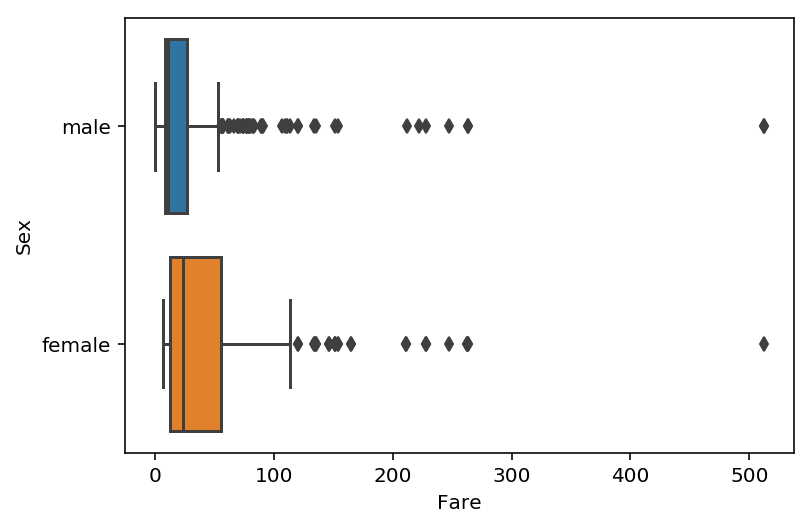

In [9]:
sns.boxplot(data=train, x='Fare', y='Sex')

In [10]:
train.groupby('Sex')['Pclass'].value_counts(normalize=True)

Sex     Pclass
female  3         0.458599
        1         0.299363
        2         0.242038
male    3         0.601386
        1         0.211438
        2         0.187175
Name: Pclass, dtype: float64

### Фичи

чтобы одинаковым образом обработать train и test и не дублировать все операции 2 раза, соединим эти два набора данных в один, не забыв при этом:
1. выкинуть целевую переменную из train
2. проверить на соответствие набора признаков друг другу
3. добавить флаг того, является ли объект тестовым или нет

In [11]:
y_train = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [12]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [13]:
train['is_test'] = 0
test['is_test'] = 1

In [14]:
df = pd.concat([train, test])

супер, теперь полный набор данных можно обрабатывать вместе и в любой момент, уже обработанными, обратно разъединить на обучающую и тестовую выборки

Пол male/female закодируем в 1/0 и удалим переменные, с которыми мы не будем сейчас работать

In [15]:
df["isMale"] = df.Sex.replace({"male": 1, "female":0})
df.drop(["Sex", "Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)

признаки, значения которых составляют небольшой перечислимый набор, закодируем в отдельные столбцы 

In [16]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [17]:
df_dummies = pd.get_dummies(df, columns=['Pclass', 'Embarked'])

In [18]:
df_dummies.head(10)

,Age,SibSp,Parch,Fare,is_test,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
5,NaN,0,0,8.4583,0,1,0,0,1,0,1,0
6,54.0,0,0,51.8625,0,1,1,0,0,0,0,1
7,2.0,3,1,21.0750,0,1,0,0,1,0,0,1
8,27.0,0,2,11.1333,0,0,0,0,1,0,0,1
9,14.0,1,0,30.0708,0,0,0,1,0,1,0,0


In [19]:
df_dummies.isnull().sum()

Age           263
SibSp           0
Parch           0
Fare            1
is_test         0
isMale          0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [20]:
X_train = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

In [21]:
columns = X_train.columns

In [22]:
X_train.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,1,0,0,1
5,NaN,0,0,8.4583,1,0,0,1,0,1,0
6,54.0,0,0,51.8625,1,1,0,0,0,0,1
7,2.0,3,1,21.0750,1,0,0,1,0,0,1
8,27.0,0,2,11.1333,0,0,0,1,0,0,1
9,14.0,1,0,30.0708,0,0,1,0,1,0,0


### Заполнение пустых значений

заполним пустые значения средними по соответственным признакам

In [23]:
from sklearn.preprocessing import Imputer

In [24]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [26]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns)

# Нормировка значений, PCA, выделение кластеров

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_train_imputed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
X_train_imputed_scaled = scaler.transform(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=columns)

In [31]:
X_test_imputed = imputer.transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=columns)

In [32]:
X_test_imputed_scaled = scaler.transform(X_test_imputed)

In [33]:
X_test_imputed_scaled = pd.DataFrame(X_test_imputed_scaled, columns=columns)

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=X_train_imputed_scaled.shape[1]).fit(X_train_imputed_scaled)
for i in range(1, X_train_imputed_scaled.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.232
n-components=2, explained variance 0.410
n-components=3, explained variance 0.570
n-components=4, explained variance 0.686
n-components=5, explained variance 0.779
n-components=6, explained variance 0.851
n-components=7, explained variance 0.914
n-components=8, explained variance 0.964
n-components=9, explained variance 1.000
n-components=10, explained variance 1.000
n-components=11, explained variance 1.000


In [36]:
pca = PCA(n_components=9)

In [37]:
ppl = pca.fit_transform(X_train_imputed_scaled)
ppl_test= pca.fit_transform(X_test_imputed_scaled)

Text(0.5,1,'Пассажиры Титаника')

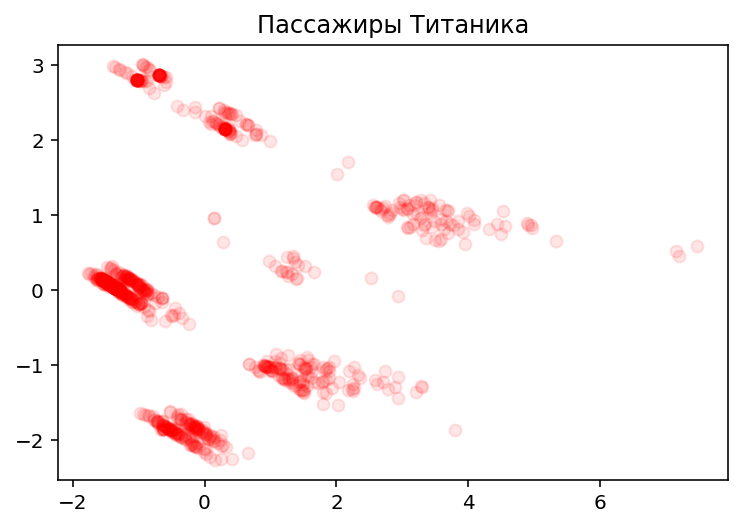

In [38]:
plt.plot(ppl[:,0], ppl[:,1], 'ro', alpha=0.1)
plt.title('Пассажиры Титаника')

можно попробовать кластеризовать по 7 кластерам и проверить, что получится:

In [39]:
from sklearn.cluster import KMeans

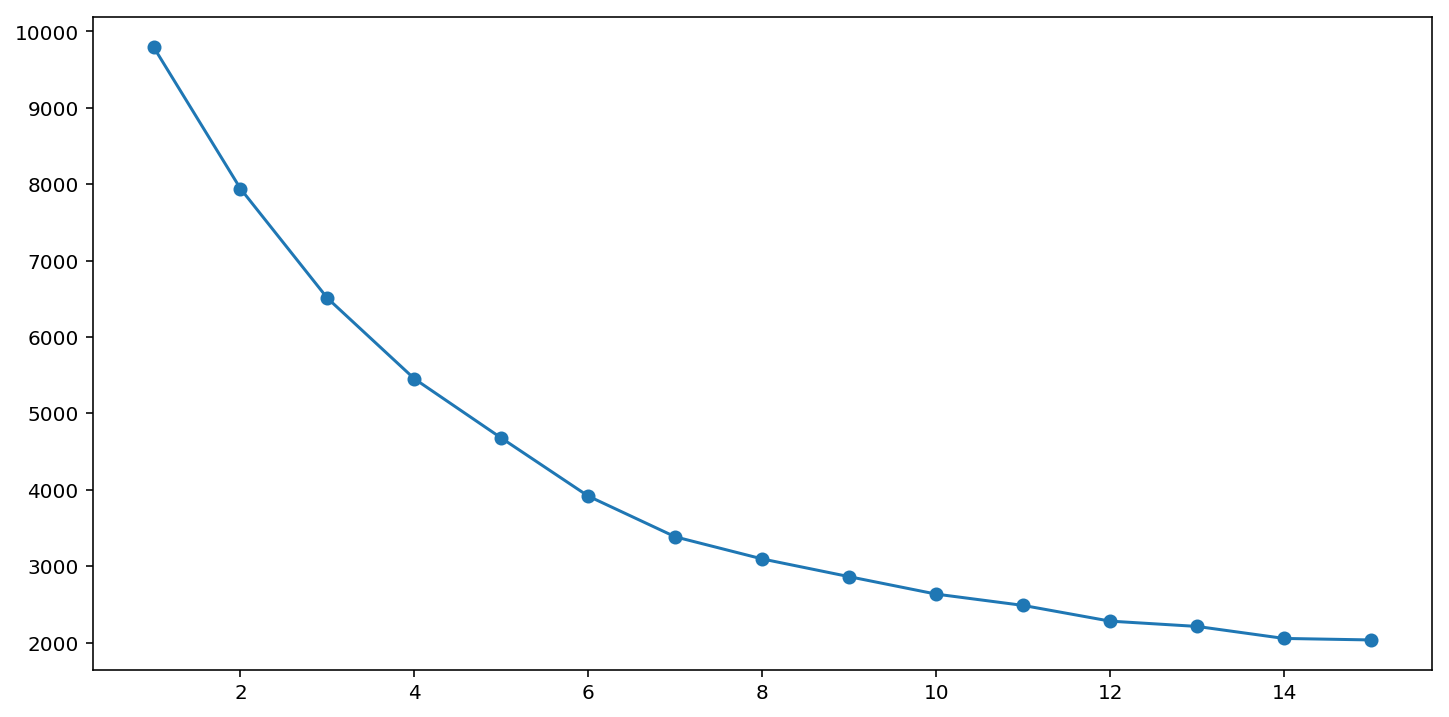

In [40]:
cluster_range_dob = range( 1, 16 )
cluster_errors_dob = []

for num_clusters in cluster_range_dob:
    clusters = KMeans( num_clusters )
    clusters.fit( ppl )
    cluster_errors_dob.append( clusters.inertia_ )
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range_dob, "cluster_errors": cluster_errors_dob } )

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [41]:
n_clusters = 8

In [42]:
kmeans = KMeans(n_clusters=n_clusters)

In [43]:
kmeans.fit(ppl)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
cluster_labels = kmeans.predict(ppl)

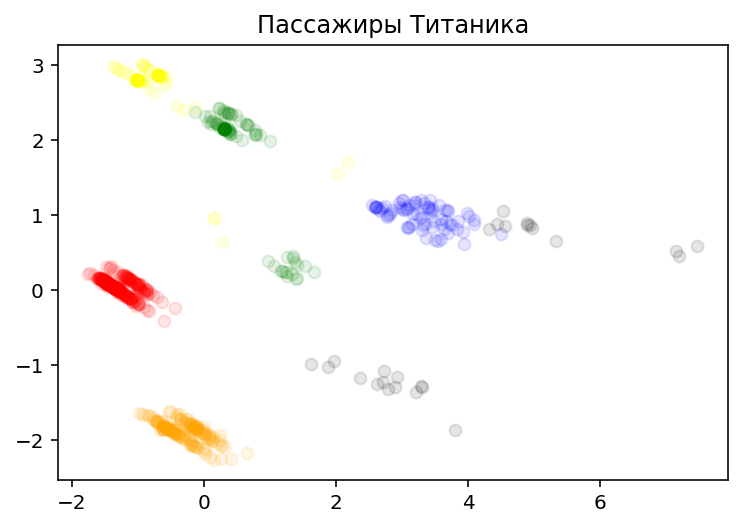

In [45]:
plt.title('Пассажиры Титаника')
for i,color in zip(range(n_clusters),{'blue','red','green','black','orange','yellow'}):
    t = ppl[cluster_labels==i]
    plt.plot(t[:,0], t[:,1], 'ro', alpha=0.1, c=color)

эти номера кластеров можно было бы подать как ещё одна фича

In [46]:
X_train_imputed['cluster']=cluster_labels
X_train_imputed = pd.get_dummies(X_train_imputed, columns=['cluster'])
columns=X_train_imputed.columns.tolist()
scaler.fit(X_train_imputed)
X_train_imputed_scaled = scaler.transform(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=columns)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\volko\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """


In [47]:
X_train_imputed_scaled.head()

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7
0,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,-0.298734,1.396543,-0.473182,-0.320504,-0.307562,-0.173372,-0.384962,-0.248955
1,0.638789,0.432793,-0.473674,0.786845,-1.355574,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710,3.347459,-0.716054,-0.473182,-0.320504,-0.307562,-0.173372,-0.384962,-0.248955
2,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,-0.298734,1.396543,-0.473182,-0.320504,-0.307562,-0.173372,-0.384962,-0.248955
3,0.407926,0.432793,-0.473674,0.420730,-1.355574,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306,-0.298734,-0.716054,-0.473182,-0.320504,-0.307562,-0.173372,2.597658,-0.248955
4,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,-0.298734,1.396543,-0.473182,-0.320504,-0.307562,-0.173372,-0.384962,-0.248955


In [48]:
cluster_labels2 = kmeans.predict(ppl_test)

In [49]:
X_test_imputed_scaled

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.369449,-0.474545,-0.473674,-0.490783,0.737695,-0.565685,-0.510152,0.902587,-0.482043,3.251373,-1.614710
1,1.331378,0.432793,-0.473674,-0.507479,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
2,2.485693,-0.474545,-0.473674,-0.453367,0.737695,-0.565685,1.960202,-1.107926,-0.482043,3.251373,-1.614710
3,-0.207709,-0.474545,-0.473674,-0.474005,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
4,-0.592481,0.432793,0.767630,-0.401017,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
5,-1.208115,-0.474545,-0.473674,-0.462679,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
6,0.023154,-0.474545,-0.473674,-0.494810,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,3.251373,-1.614710
7,-0.284663,0.432793,0.767630,-0.064516,0.737695,-0.565685,1.960202,-1.107926,-0.482043,-0.307562,0.619306
8,-0.900298,-0.474545,-0.473674,-0.502864,-1.355574,-0.565685,-0.510152,0.902587,2.074505,-0.307562,-1.614710
9,-0.669435,1.340132,-0.473674,-0.162169,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306


In [50]:
X_test_imputed['cluster']=cluster_labels2
X_test_imputed = pd.get_dummies(X_test_imputed, columns=['cluster'])
scaler.fit(X_test_imputed)
X_test_imputed_scaled = scaler.transform(X_test_imputed)
X_test_imputed_scaled = pd.DataFrame(X_test_imputed_scaled, columns=columns)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\volko\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [52]:
depths = np.arange(1,5)
features_num = np.arange(1,len(X_train_imputed_scaled.columns.tolist()))
grid = {'max_depth': depths, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)

In [53]:
%%time
gridsearch.fit(X_train_imputed_scaled, y_train)

Wall time: 1.37 s


C:\Users\volko\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4]), 'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [54]:
gridsearch.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
parametr=gridsearch.best_params_

In [56]:
parametr

{'max_depth': 4, 'max_features': 16}

In [57]:
from sklearn.model_selection import train_test_split
X_train_fin, x_test_s,y_train_fin, y_test_s = train_test_split(X_train_imputed_scaled, y_train, test_size=0.2)

In [58]:
Tree = DecisionTreeClassifier(max_depth=parametr['max_depth'],
            max_features=parametr['max_features'])

In [59]:
Tree.fit(X_train_fin, y_train_fin)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
y_train_pred = Tree.predict(X_train_fin)

In [62]:
accuracy_score(y_train_fin, y_train_pred)

0.8314606741573034

In [63]:
y_test_pred = Tree.predict(x_test_s)

In [64]:
accuracy_score(y_test_s, y_test_pred)

0.8100558659217877

In [65]:
model=Tree.fit(X_train_imputed_scaled, y_train)

In [66]:
predictions = model.predict(X_test_imputed_scaled)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
submussion = 'PassengerId,Survived\n'
submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(test.PassengerId, predictions)])

In [68]:
with open('submission8.txt', 'w') as file:
    file.write(submussion)

In [69]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(model, feature_names, class_names):
    print(export_graphviz(model, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [70]:
class_names=['survived' if x==1 else 'not survived'  for x in model.classes_.tolist()]

In [71]:
get_tree_dot_view(model, X_train_imputed_scaled.columns.tolist(), class_names)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="isMale <= -0.309\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = not survived", fillcolor="#e5813960"] ;
1 [label="Pclass_3 <= -0.103\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = survived", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Age <= -2.093\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = survived", fillcolor="#399de5f1"] ;
1 -> 2 ;
3 [label="cluster_5 <= 2.797\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = not survived", fillcolor="#e5813900"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = survived", fillcolor="#399de5ff"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = not survived", fillcolor="#e58139ff"] ;
3 -> 5 ;
6 [label="Fare <= -0.067\ngini = 0.091\nsamples = 168\nvalue = [8, 160]\nclass = survived", fillcolor="#399de5f2"] ;
2 -> 6 ;
7 [label="gini = 0.182\nsamples = 69\

In [72]:
for i in range(len(X_train_imputed_scaled.columns.tolist())):
    print('{}:{}'.format(X_train_imputed_scaled.columns.tolist()[i],model.feature_importances_[i]))

Age:0.07870929813374745
SibSp:0.022987907351823277
Parch:0.007882573665225287
Fare:0.06499723770190213
isMale:0.5976748250925575
Pclass_1:0.05324002782372606
Pclass_2:0.0
Pclass_3:0.14969033970691062
Embarked_C:0.0
Embarked_Q:0.0
Embarked_S:0.0
cluster_0:0.0
cluster_1:0.0
cluster_2:0.0
cluster_3:0.0
cluster_4:0.0
cluster_5:0.004803443327246656
cluster_6:0.0
cluster_7:0.02001434719686106
